## Funciones de distribución de probabilidades

### Distribución Uniforme

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
a=1
b=30
n=1000000
data= np.random.uniform(a,b,n)

(array([ 99872., 100208., 100322.,  99520., 100007., 100110.,  99904.,
        100303., 100085.,  99669.]),
 array([ 1.00002719,  3.90001685,  6.8000065 ,  9.69999615, 12.59998581,
        15.49997546, 18.39996511, 21.29995477, 24.19994442, 27.09993407,
        29.99992373]),
 <BarContainer object of 10 artists>)

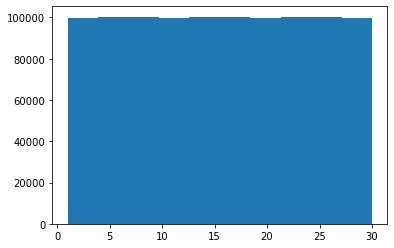

In [3]:
%matplotlib inline
plt.hist(data)

### Distribución normal

In [4]:
#genera una distribución normal estandar
data=np.random.randn(1000000)

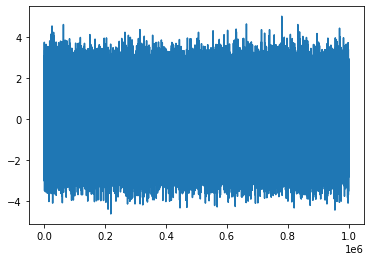

In [5]:
x=range(1,1000001)
plt.plot(x,data)

(array([1.52000e+02, 3.47200e+03, 3.91940e+04, 1.81267e+05, 3.56799e+05,
        2.97337e+05, 1.05389e+05, 1.53910e+04, 9.70000e+02, 2.90000e+01]),
 array([-4.60829419, -3.6457943 , -2.6832944 , -1.72079451, -0.75829461,
         0.20420529,  1.16670518,  2.12920508,  3.09170497,  4.05420487,
         5.01670477]),
 <BarContainer object of 10 artists>)

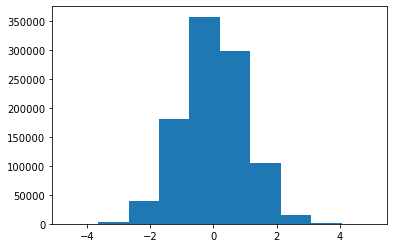

In [6]:
plt.hist(data)

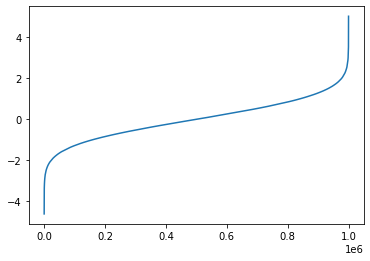

In [7]:
plt.plot(x,sorted(data))

Z = (x - m)/sd -> N(0,1), x= m + sd * z

In [8]:
m=5.5
sd=2.5
z=np.random.randn(10000)
data=m+sd*z

(array([  17.,  110.,  664., 1887., 2963., 2688., 1279.,  349.,   39.,
           4.]),
 array([-4.06501611, -2.07138339, -0.07775068,  1.91588203,  3.90951474,
         5.90314745,  7.89678016,  9.89041288, 11.88404559, 13.8776783 ,
        15.87131101]),
 <BarContainer object of 10 artists>)

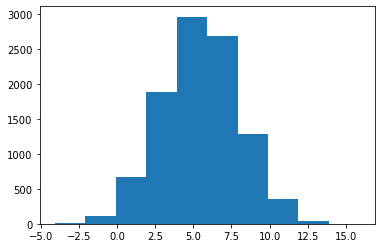

In [9]:
plt.hist(data)

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [10]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1429479999999965


(3.1429479999999965, [<matplotlib.lines.Line2D at 0x7fb241f34610>])

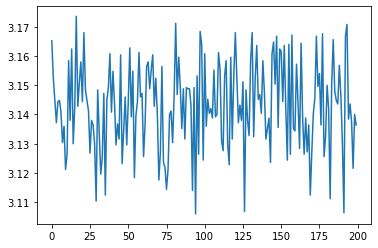

In [16]:
pi_montecarlo(10000,200)

## Dummy Data Sets

In [33]:
n=1000000
data= pd.DataFrame(
    {
        'A': np.random.randn(n),
        'B': 1.5 + 2.5 * np.random.randn(n),
        'C': np.random.uniform(5,32,n)
    }
)

In [34]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.001334,1.501353,18.499567
std,0.999340,2.499961,7.796543
min,-4.850025,-10.437518,5.000015
25%,-0.673663,-0.183769,11.747742
50%,0.002131,1.503121,18.496868
75%,0.675524,3.187392,25.252899
max,4.790460,13.237676,31.999920


(array([1.46000e+02, 3.23500e+03, 3.19910e+04, 1.47475e+05, 3.16373e+05,
        3.15927e+05, 1.48717e+05, 3.26880e+04, 3.28500e+03, 1.63000e+02]),
 array([-4.50351854e+00, -3.60327361e+00, -2.70302867e+00, -1.80278373e+00,
        -9.02538791e-01, -2.29385212e-03,  8.97951086e-01,  1.79819602e+00,
         2.69844096e+00,  3.59868590e+00,  4.49893084e+00]),
 <BarContainer object of 10 artists>)

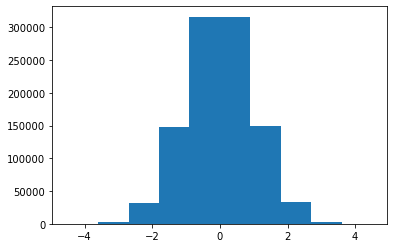

In [31]:
plt.hist(data['A'])

(array([7.20000e+01, 1.93300e+03, 2.45360e+04, 1.35134e+05, 3.21794e+05,
        3.34230e+05, 1.50483e+05, 2.93310e+04, 2.40500e+03, 8.20000e+01]),
 array([-10.43751775,  -8.06999842,  -5.70247909,  -3.33495976,
         -0.96744043,   1.4000789 ,   3.76759823,   6.13511755,
          8.50263688,  10.87015621,  13.23767554]),
 <BarContainer object of 10 artists>)

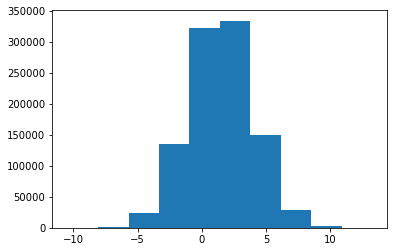

In [35]:
plt.hist(data['B'])

(array([ 99850., 100227., 100190., 100006.,  99856., 100022.,  99661.,
        100166.,  99649., 100373.]),
 array([ 5.00001497,  7.70000549, 10.39999601, 13.09998653, 15.79997705,
        18.49996757, 21.19995809, 23.89994861, 26.59993913, 29.29992965,
        31.99992017]),
 <BarContainer object of 10 artists>)

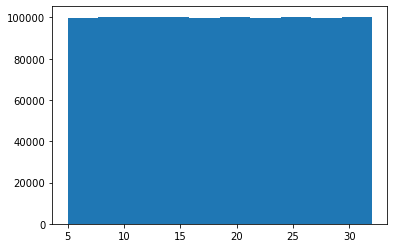

In [36]:
plt.hist(data['C'])

In [39]:
mainpath="/Users/luisdelaespriella/Desktop/PERSONAL/CURSOS/PROGRAMACION/UDEMY/ML/python-ml-course/datasets/"
filename="customer-churn-model/Customer Churn Model.txt"
fullpath= os.path.join(mainpath, filename)

In [40]:
data = pd.read_csv(fullpath)

In [41]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [44]:
column_names =data.columns.values.tolist()

In [45]:
a=len(column_names)
a

21

In [49]:
new_data = pd.DataFrame(
    {
        'Column Names': column_names,
        'A': np.random.randn(a),
        'B': np.random.uniform(0,1,a)
    },
    index=range(42,42+a)
)

In [50]:
new_data

,Column Names,A,B
42,State,0.892281,0.759248
43,Account Length,-0.433930,0.778342
44,Area Code,0.833023,0.787749
45,Phone,-0.615543,0.390403
46,Int'l Plan,-1.539868,0.238088
47,VMail Plan,-0.606925,0.710771
48,VMail Message,-1.062161,0.334922
49,Day Mins,0.460142,0.737488
50,Day Calls,1.026575,0.770434
51,Day Charge,1.301987,0.046359
